In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Platform have highest games**

<BarContainer object of 31 artists>

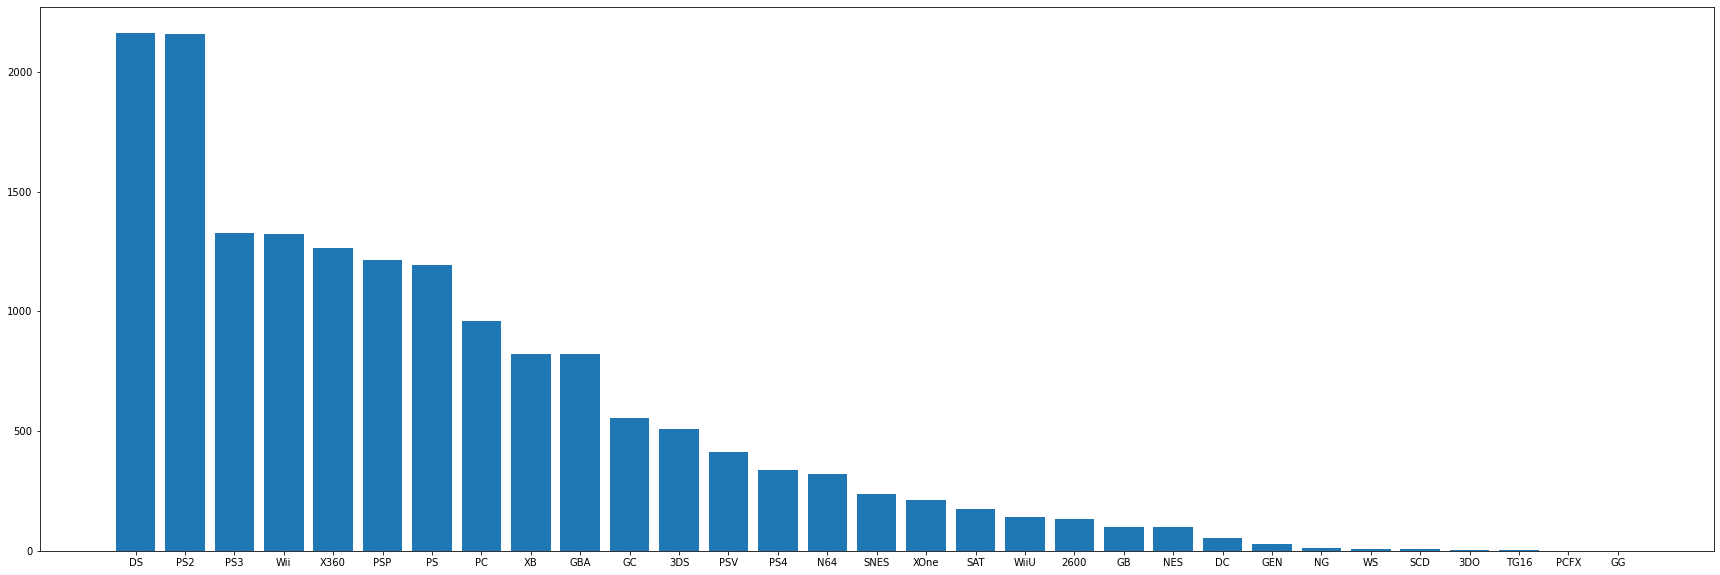

In [2]:
plt.figure(figsize=(30,10))
plt.bar(data['Platform'].value_counts().index,data['Platform'].value_counts())

**No. of Games release in every year**

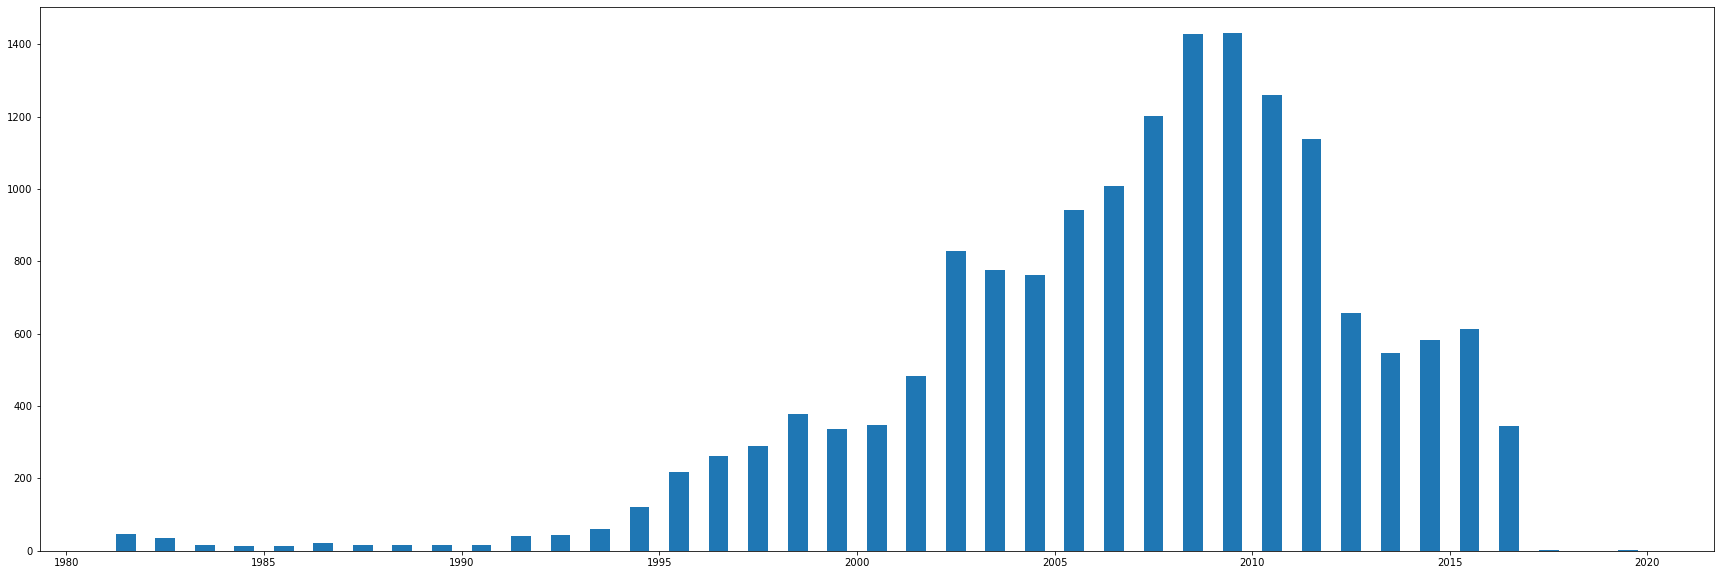

In [3]:
plt.figure(figsize=(30,10))
plt.hist(data['Year'],bins=[a for a in range(1981,2021)],rwidth=0.5)
plt.show()

**Which Genre has the highest no. of games**

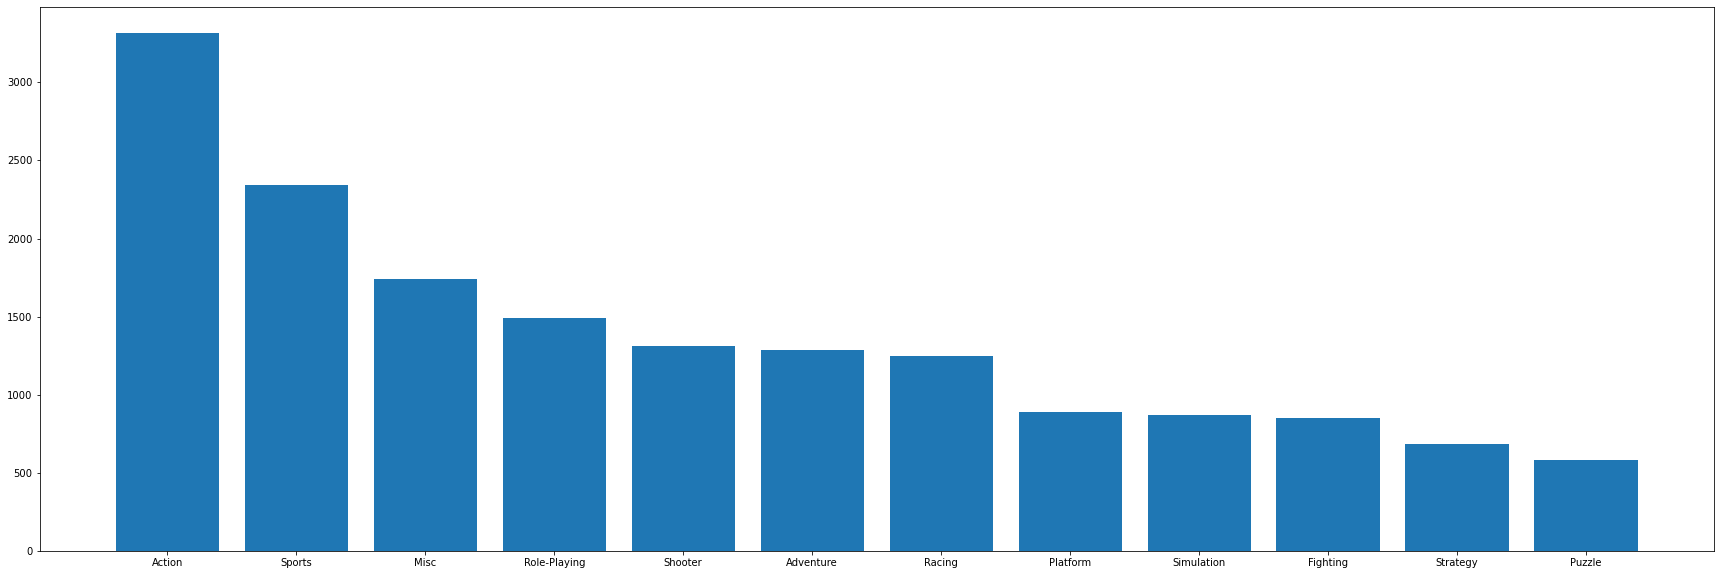

In [4]:
plt.figure(figsize=(30,10))
plt.bar(data['Genre'].value_counts().index,data['Genre'].value_counts())
plt.show()

**Game Publishers vs No. of games they published**

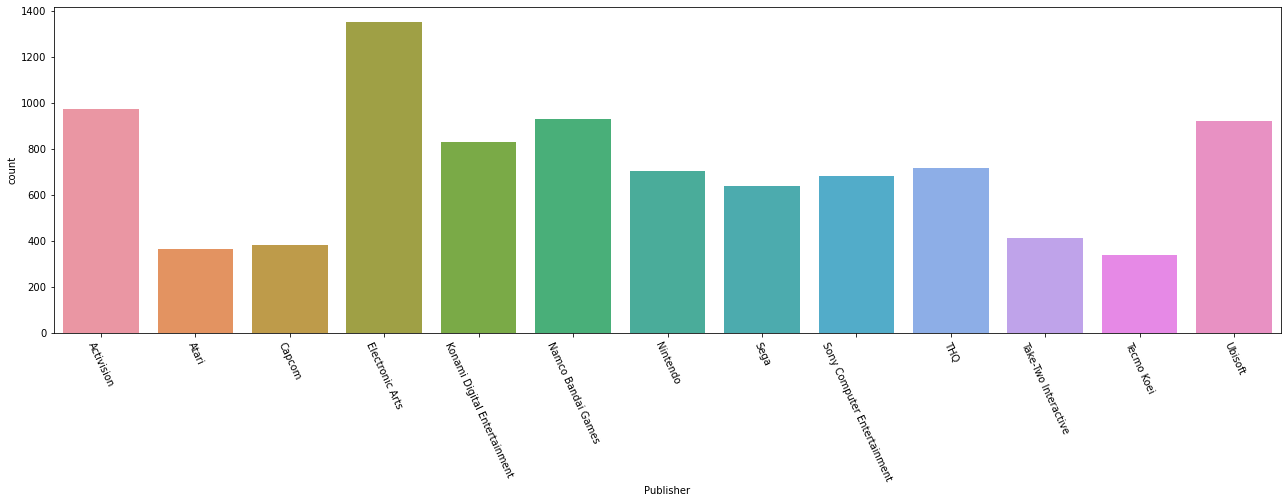

In [5]:
df_Publisher=pd.DataFrame(data.groupby("Publisher").Rank.count())
df_Publisher = df_Publisher.rename(columns={"Rank": "count"})
df_Publisher = df_Publisher.loc[df_Publisher["count"] > 300]

ingredients = list(df_Publisher.index)
plt.figure(figsize=(22,6))
a = sns.barplot(x=df_Publisher.index, y=df_Publisher["count"])
a.set_xticklabels(labels=df_Publisher.index, rotation=-65) 
plt.show()

<AxesSubplot:xlabel='Publisher', ylabel='Global_Sales'>

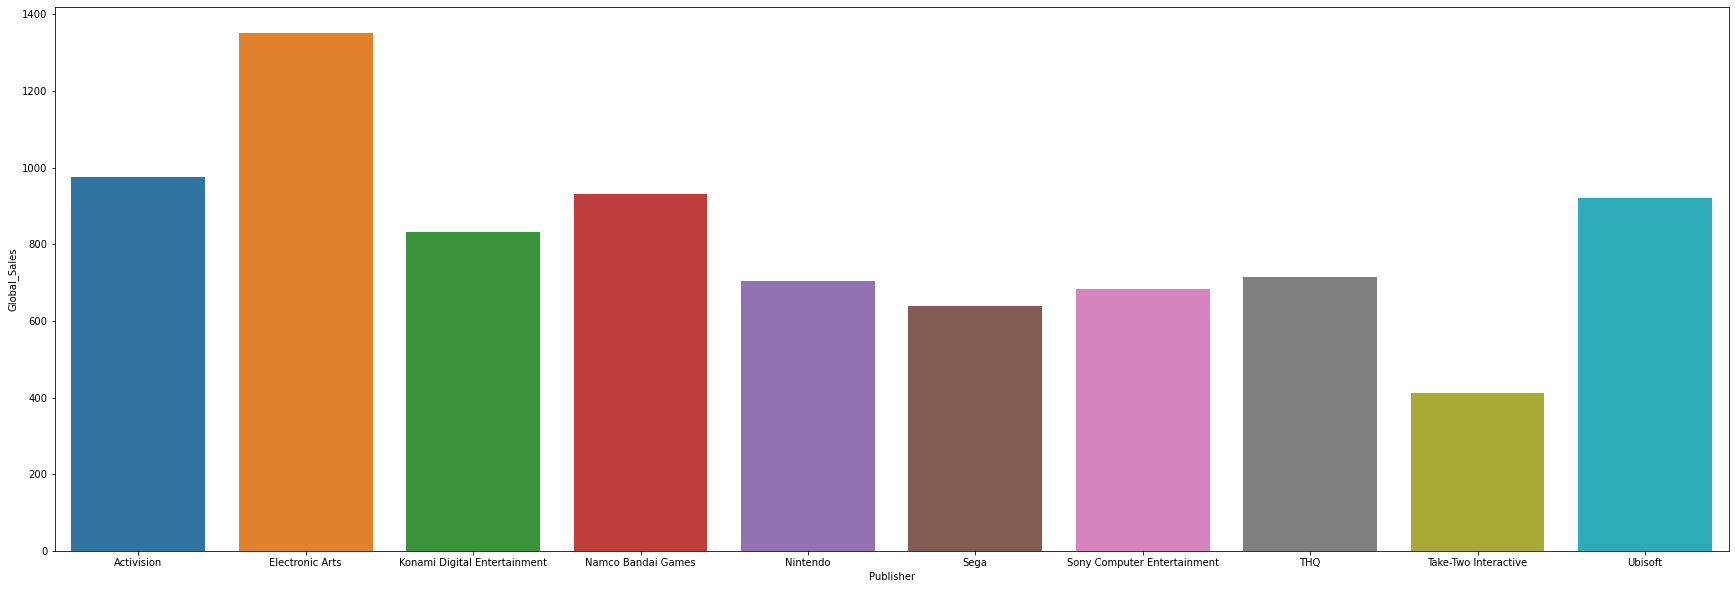

In [6]:
dff = data.groupby(['Publisher'], as_index=False)['Global_Sales'].count()
dff=dff[dff['Global_Sales']>400]
plt.figure(figsize=(30,10))

sns.barplot(x='Publisher',data=dff,y='Global_Sales')

**Highest Global_Sales game**

<AxesSubplot:xlabel='Name', ylabel='Global_Sales'>

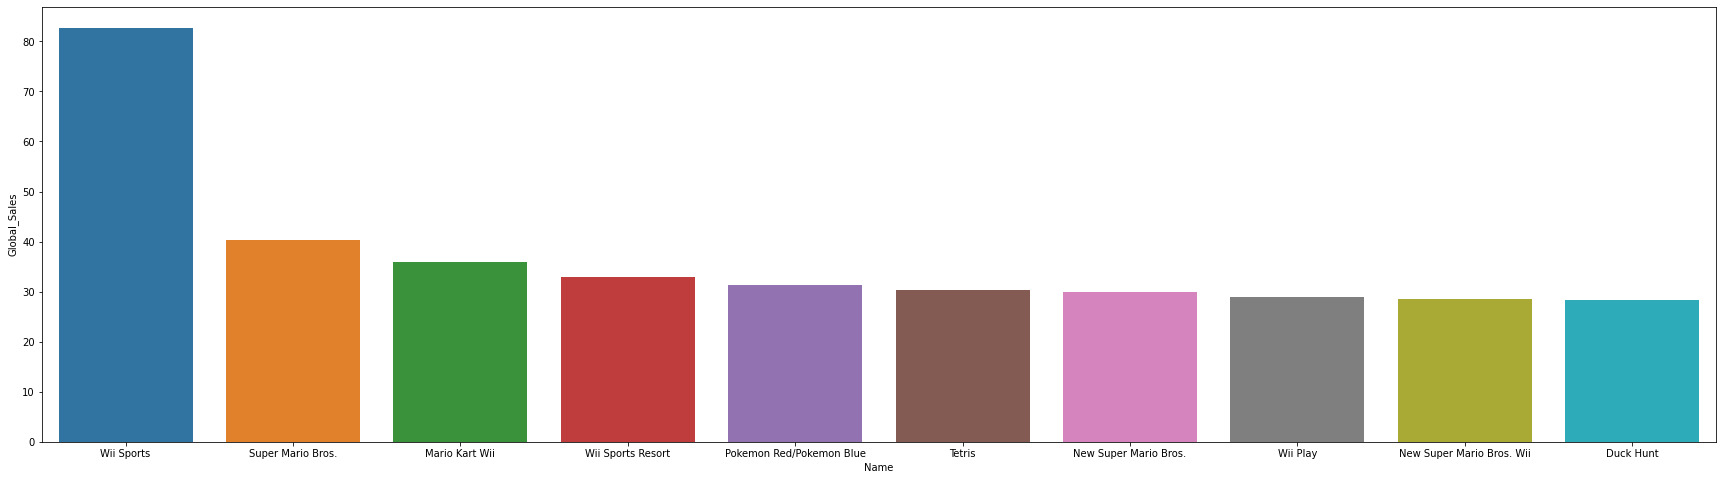

In [7]:
df=data[['Name','Global_Sales']].sort_values('Global_Sales',ascending=False)[:10]
plt.figure(figsize=(30,8))
sns.barplot(data=df,x='Name',y='Global_Sales')

**Genre vs sales heatmap**

<AxesSubplot:ylabel='Genre'>

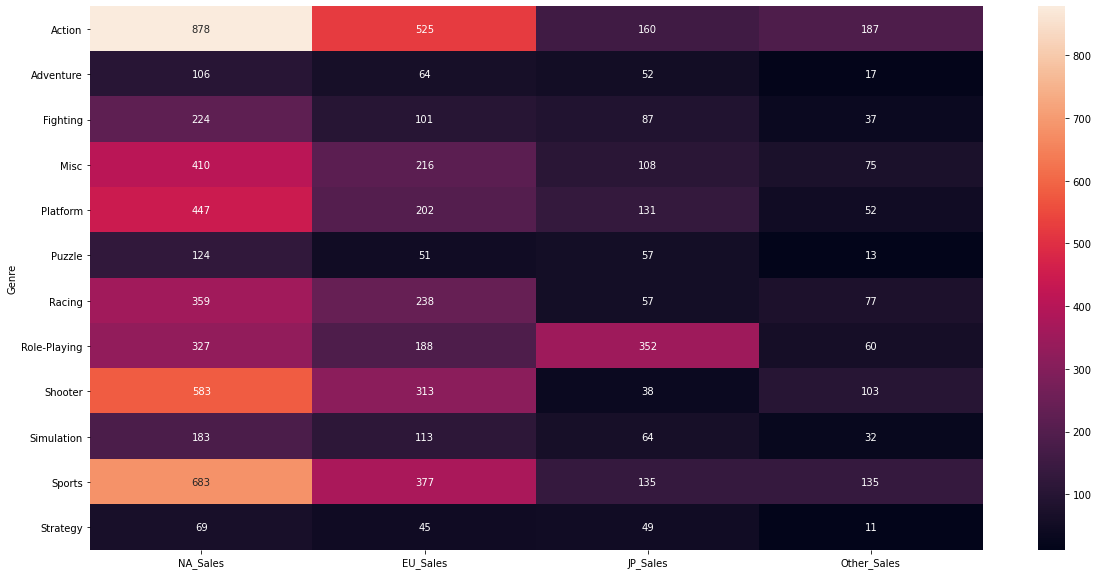

In [8]:
sales=data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales = sales.groupby('Genre').sum()
plt.figure(figsize=(20,10))
sns.heatmap(sales,annot=True,fmt= '.0f')

**Genre vs sales plot**

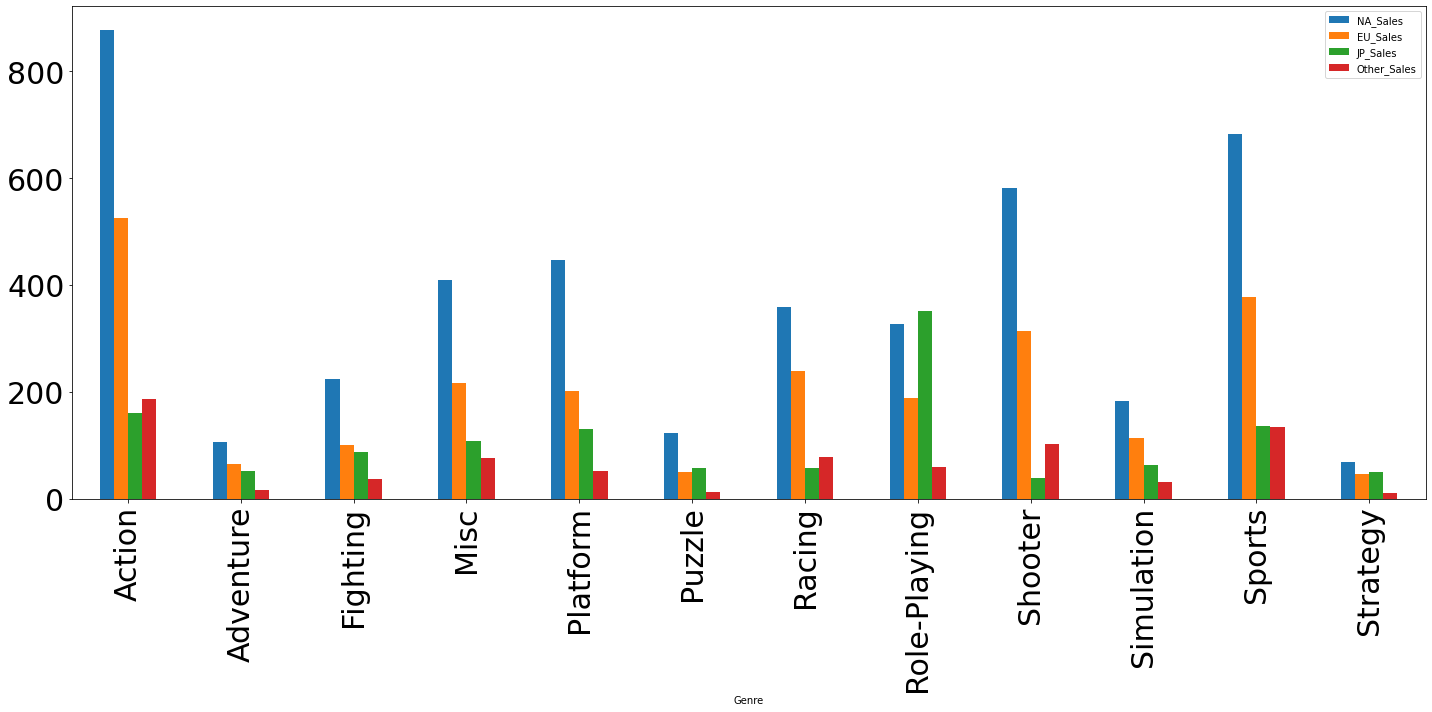

In [9]:
sales.plot.bar(figsize=(20,10),fontsize=30)
plt.tight_layout()
plt.show()

**Year vs sales plot**

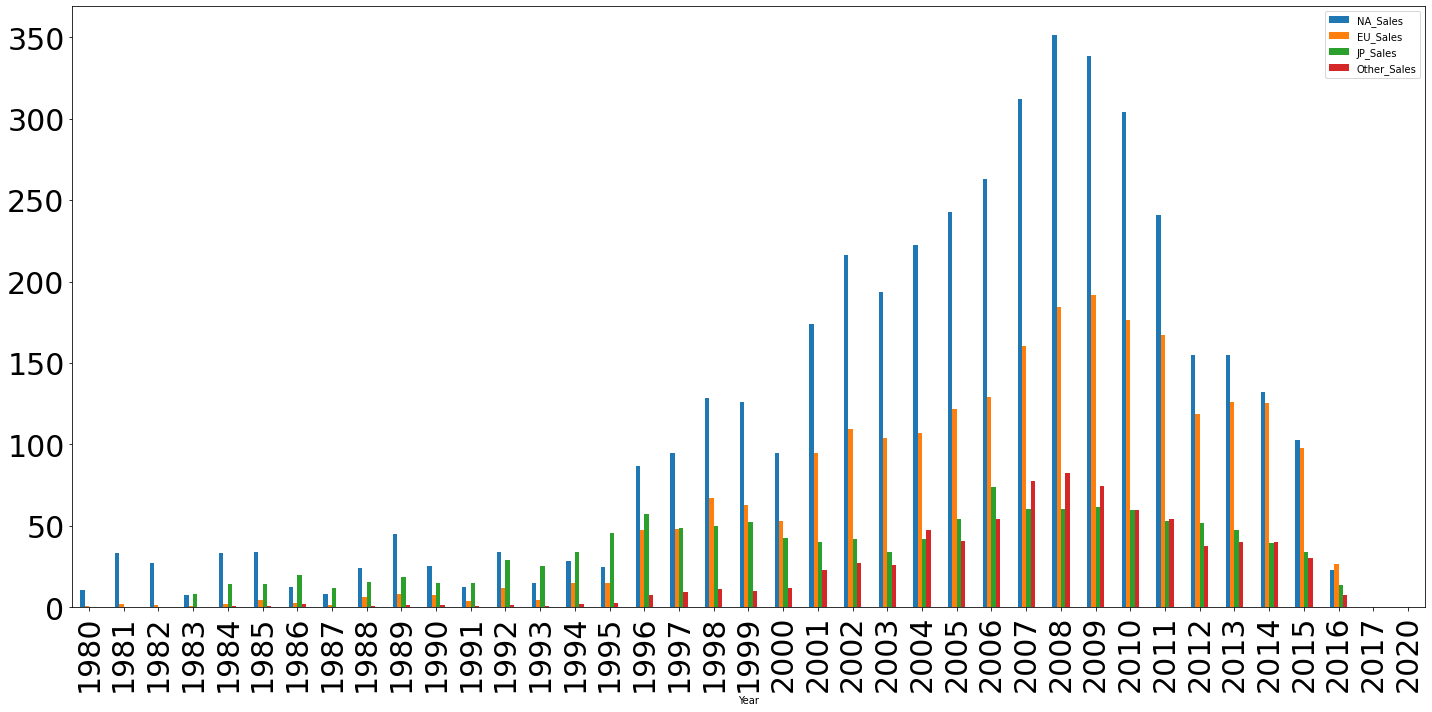

In [10]:
sales1=data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby('Year').sum()
sales1.index=sales1.index.astype(int)
sales1.plot.bar(figsize=(20,10),fontsize=30)
plt.tight_layout()
plt.show()